# test data

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("SalaryData_Test.csv")
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
data.shape


(15060, 14)

In [8]:
data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
# now we visualized the data

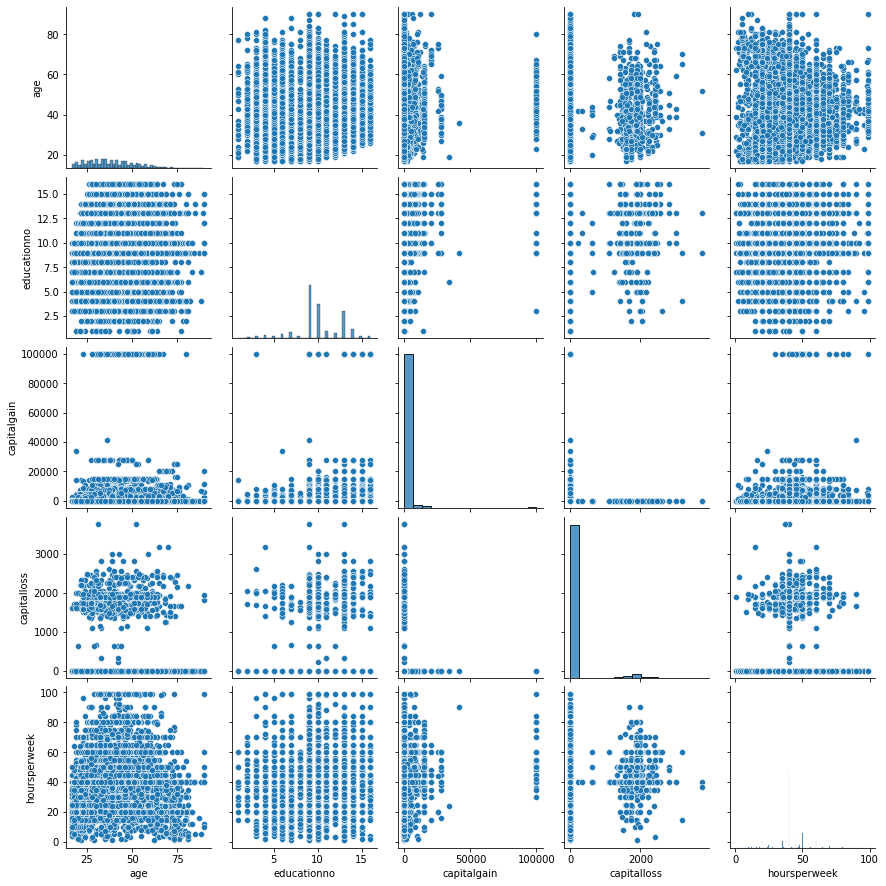

In [12]:
sns.pairplot(data)

 Male      10147
 Female     4913
Name: sex, dtype: int64

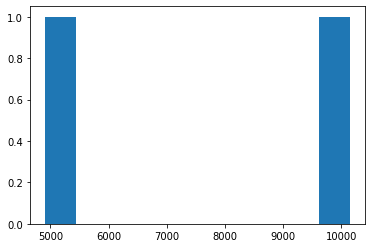

In [14]:
import matplotlib.pyplot as plt 
A = data['sex'].value_counts()
plt.hist(A)
A

(array([2160.,    0., 6203.,    0., 3976.,    0., 1576.,    0.,  685.,
         460.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

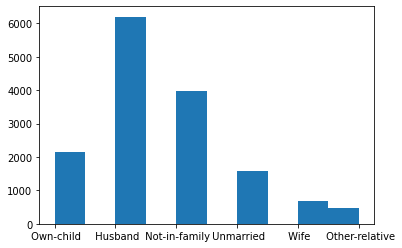

In [16]:
plt.hist(data['relationship'])

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

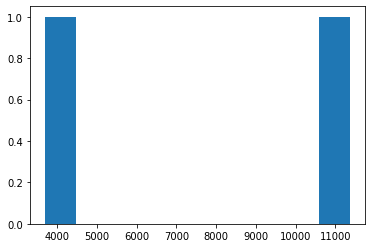

In [18]:
C = data['Salary'].value_counts()
plt.hist(C)
C

In [19]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['workclass']= le.fit_transform(data['workclass'])
data['education']= le.fit_transform(data['education'])
data['maritalstatus']= le.fit_transform(data['maritalstatus'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['native']= le.fit_transform(data['native'])
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [23]:
x= data.iloc[:,:13]
y= data.iloc[:,-1]

In [24]:
# normalized the data 
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit_transform(x)
x[0:13]

array([[-1.02900513, -0.222347  , -2.42343884, -1.2165628 ,  0.93318745,
         0.00272543,  1.00610775, -2.03438913,  0.69583225, -0.14543845,
        -0.2191694 , -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, -0.43489824, -0.39546327,
        -0.49478949, -0.88198978,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 ,  0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215,  0.73759862, -0.39546327,
         0.99775528, -0.88198978,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 , -0.07888904,  0.26058067],
       [ 0.39100021, -0.222347  ,  1.23561678, -0.04406595, -0.39546327,
         0.00272543, -0.88198978, -2.03438913,  0.69583225,  0.85262384,
        -0.2191694 , -0.07888904,  0.26058067],
       [-0.35637102, -0.222347  , -2.68479996, -1.60739509,  0.93318745,
         0.25148289, -0.25262394,  0.38223023,  0.69583225, -0.14543845,
        -0.2191694 , -0.90790934,  0.26058067],
       [ 1.81100556,  1.847211

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
y_test.shape

(4518,)

In [28]:
# now we methoed BernoulliNB , GaussianNB , MultinomialNB
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#BernoulliNB

In [32]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect = y_test


y_pred = BernNB.predict(x_test)

BernoulliNB(binarize=True)


In [33]:
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [34]:
accuracy_score(y_expect,y_pred)

0.7656042496679947

In [ ]:
# GaussianNB

In [36]:
GausNB=  GaussianNB()
GausNB.fit(x_train,y_train)
y_pred = GausNB.predict(x_test)
accuracy_score(y_expect,y_pred)

0.8012394864984507

In [37]:
y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [38]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect = y_test

y_pred = BernNB.predict(x_test)

BernoulliNB(binarize=0.1)


In [39]:
accuracy_score(y_expect,y_pred)

0.7841965471447543

# train data

In [41]:
data2 = pd.read_csv("SalaryData_Train.csv")
data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [43]:
data2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [44]:
data2.shape

(30161, 14)

In [45]:
data2.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
87      1
84      1
Name: age, Length: 73, dtype: int64

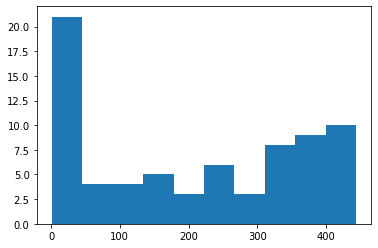

In [48]:
# visualized the data 
B = data['age'].value_counts()
plt.hist(B)
B

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

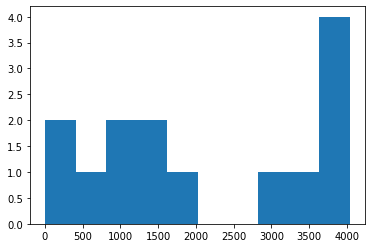

In [50]:
U = data2['occupation'].value_counts()
plt.hist(U)
U

In [51]:
data2.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data2['workclass']=le.fit_transform(data2['workclass'])
data2['education']=le.fit_transform(data2['education'])
data2['maritalstatus']=le.fit_transform(data2['maritalstatus'])
data2['occupation']=le.fit_transform(data2['occupation'])
data2['relationship']=le.fit_transform(data2['relationship'])
data2['race']=le.fit_transform(data2['race'])
data2['sex']=le.fit_transform(data2['sex'])
data2['native']=le.fit_transform(data2['native'])
data2.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [60]:
x=data2.iloc[:,:13]
y=data2.iloc[:,-1]

In [61]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=1)
y_test.shape

(9049,)

In [63]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [65]:
BernNB= BernoulliNB(binarize=True)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect = y_test

y_pred=BernNB.predict(x_test)

BernoulliNB(binarize=True)


In [66]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [68]:
accuracy_score(y_expect,y_pred)

0.778649574538623

In [69]:
GausNB=GaussianNB()
GausNB.fit(x_train,y_train)
y_pred = GausNB.predict(x_test)
accuracy_score(y_expect,y_pred)

0.7898110288429661

In [71]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(x_train,y_train)
print(BernNB)
y_expect=y_test

y_pred=BernNB.predict(x_test)

BernoulliNB(binarize=0.1)


In [72]:
accuracy_score(y_expect,y_pred)

0.7232843408111393